# Training and Testing Data 

Here to do preprocessing of data and split raw data into two sets, training set & testing set (Holdout 1/3)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Read in csv file of raw traffic record
rec_df_raw = pd.read_csv("./data/tmdb_5000_features.csv")
buk_df_raw = pd.read_csv("./output/classification/cast_bucket.csv")

In [31]:
buk_df = buk_df_raw[['cast_bucket']]
buk_df.head()

,cast_bucket
0,3
1,1
2,3
3,3
4,1


In [32]:
# Delete unwanted features, features: language cast_num cast_0 crew_num director genre_0 campany_0 country
rec_df =  rec_df_raw[['language', 'cast_num', 'cast_0', 'crew_num', 'director', 'genre_0', 'company_0', 'country','popularity']]
rec_df.insert(2, 'new_cast_num', buk_df['cast_bucket'])
rec_df.head()

,language,cast_num,new_cast_num,cast_0,crew_num,director,genre_0,company_0,country,popularity
0,en,83,3,Sam Worthington,153,James Cameron,Action,Ingenious Film Partners,US,150.437577
1,en,34,1,Johnny Depp,32,Gore Verbinski,Adventure,Walt Disney Pictures,US,139.082615
2,en,83,3,Daniel Craig,155,Sam Mendes,Action,Columbia Pictures,GB,107.376788
3,en,158,3,Christian Bale,217,Christopher Nolan,Action,Legendary Pictures,US,112.312950
4,en,27,1,Taylor Kitsch,132,Andrew Stanton,Action,Walt Disney Pictures,US,43.926995


# Data Visualization

# Visualization for attribute/label class popularity

In [34]:
popl_df = rec_df[['popularity']]
popl_ary = np.array(popl_df)
popl_df.head()

,popularity
0,150.437577
1,139.082615
2,107.376788
3,112.312950
4,43.926995


Box Plot

To evaluate the distribution of data, and decide how to transfer contineous attributes into categorical

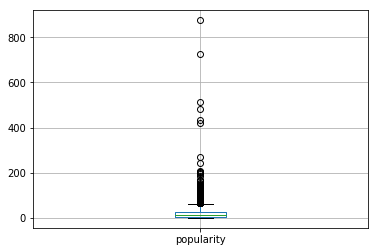

In [35]:
boxplot = popl_df.boxplot(column=['popularity'])

In [36]:
# Find the minimum rate of popularity
popl_ary.min()

0.00037200000000000004

Assume that the rate of popularity in reviewers' perspective has a half-half percentage. The probability of a movie being regarded as popular equals that being regarded as unpopular. Thus, the median of popularity attribute is chosen to be the line which calssifies movies' popularity below median as unpopular, those above median as popular.

In [37]:
# 50 percentile from 0 to 13 -> 0:unpopular above 13 -> 1:popular
np.median(popl_ary)

12.976720499999999

In [ ]:
# 75 percentile from 17 to 32 -> 2
np.percentile(crew_ary, 75)

In [38]:
for index, row in popl_df.iterrows():
    popl = row["popularity"]
    if 0<=popl and popl<=13:
        row['popularity'] = 0
    else:
        row['popularity'] = 1

rec_df.insert(10, 'new_popl', popl_df['popularity'])

In [39]:
rec_df.head()

,language,cast_num,new_cast_num,cast_0,crew_num,director,genre_0,company_0,country,popularity,new_popl
0,en,83,3,Sam Worthington,153,James Cameron,Action,Ingenious Film Partners,US,150.437577,1.0
1,en,34,1,Johnny Depp,32,Gore Verbinski,Adventure,Walt Disney Pictures,US,139.082615,1.0
2,en,83,3,Daniel Craig,155,Sam Mendes,Action,Columbia Pictures,GB,107.376788,1.0
3,en,158,3,Christian Bale,217,Christopher Nolan,Action,Legendary Pictures,US,112.312950,1.0
4,en,27,1,Taylor Kitsch,132,Andrew Stanton,Action,Walt Disney Pictures,US,43.926995,1.0


# Visualization for attribute crew_num

In [40]:
crew_num = rec_df[['crew_num']]
crew_ary = np.array(crew_num)
crew_num.head()

,crew_num
0,153
1,32
2,155
3,217
4,132


Box Plot

To evaluate the distribution of data, and decide how to transfer contineous attributes into categorical

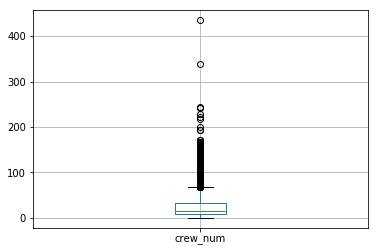

In [41]:
boxplot = crew_num.boxplot(column=['crew_num'])

In [42]:
# 25 percentile from 0 to 8 -> 0
np.percentile(crew_ary, 25)

8.0

In [43]:
# 50 percentile from 9 to 16 -> 1
np.median(crew_ary)

16.0

In [44]:
# 75 percentile from 17 to 32 -> 2
np.percentile(crew_ary, 75)

32.0

In [45]:
# 100 percentile from 32 to 435 -> 3
np.percentile(crew_ary, 100)

435.0

In [46]:
for index, row in crew_num.iterrows():
    num = row["crew_num"]
    if 0<=num and num<=8:
        row['crew_num'] = 0
    elif 8<num and num<=16:
        row['crew_num'] = 1
    elif 17<num and num<=32:
        row['crew_num'] = 2
    else:
        row['crew_num'] = 3

rec_df.insert(5, 'new_crew_num', crew_num['crew_num'])

In [47]:
rec_df.head()

,language,cast_num,new_cast_num,cast_0,crew_num,new_crew_num,director,genre_0,company_0,country,popularity,new_popl
0,en,83,3,Sam Worthington,153,3,James Cameron,Action,Ingenious Film Partners,US,150.437577,1.0
1,en,34,1,Johnny Depp,32,2,Gore Verbinski,Adventure,Walt Disney Pictures,US,139.082615,1.0
2,en,83,3,Daniel Craig,155,3,Sam Mendes,Action,Columbia Pictures,GB,107.376788,1.0
3,en,158,3,Christian Bale,217,3,Christopher Nolan,Action,Legendary Pictures,US,112.312950,1.0
4,en,27,1,Taylor Kitsch,132,3,Andrew Stanton,Action,Walt Disney Pictures,US,43.926995,1.0


# Categorical data vectorize

In [49]:
columns = ['language', 'cast_0', 'director', 'genre_0', 'company_0', 'country']

vectors = {}
# for each col
for col in columns:
    count = 0
    dic = {}
    result = []
    for cell in rec_df[col]:
        # find a match in dictionary
        if cell not in dic.keys():
            dic[cell] = count
            result.append(count)
            count += 1
        else:
            result.append(dic[cell])
    # insert each column into dictionary (for new dataframe)
    vectors[col] = result
        
# create a new dataframe
vector_df = pd.DataFrame(vectors)
# add the numeric columns
vector_df['cast_num'] = rec_df['new_cast_num']
vector_df['crew_num'] = rec_df['new_crew_num']
vector_df['popularity'] = rec_df['new_popl']
vector_df.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity
0,0,0,0,0,0,0,3,3,1.0
1,0,1,1,1,1,0,1,2,1.0
2,0,2,2,0,2,1,3,3,1.0
3,0,3,3,0,3,0,3,3,1.0
4,0,4,4,0,1,0,1,3,1.0


In [88]:
# export the vector data to csv, not shuffled, every time run should export original version
vector_df.to_csv('output/classification/vector_data.csv', index=False)

In [89]:
vector_df.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity
404,0,202,13,5,31,0,0,1,1.0
2803,0,371,1212,13,584,6,0,0,0.0
4203,26,1690,1956,5,1051,9,0,0,0.0
1995,0,32,135,6,344,0,0,3,1.0
3942,0,518,1793,8,942,0,0,1,0.0


# Split data into training sets and test sets (Holdout)

# Notice:

Below are the data shuffling part, every time run up to here shall change a file name of the exported csv. Otherwise the data used before will be lost every time run following part!!!

In [90]:
# Shuffe vector dataframe to make data saperate randomly, index maintained the same -> or .reset_index(drop=True)
vector_df = vector_df.sample(frac=1)
vector_df.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity
2120,0,741,440,15,168,6,0,2,1.0
257,0,23,80,0,31,13,3,3,1.0
926,0,313,437,3,18,0,0,1,1.0
4431,32,1839,2109,5,1157,9,0,0,0.0
3028,0,191,180,0,15,0,0,2,1.0


In [91]:
# Raw 4790 movies, training 3194, testing 1596
train_df = vector_df.head(3194)
test_df = vector_df.tail(1596)

In [92]:
train_df.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity
2120,0,741,440,15,168,6,0,2,1.0
257,0,23,80,0,31,13,3,3,1.0
926,0,313,437,3,18,0,0,1,1.0
4431,32,1839,2109,5,1157,9,0,0,0.0
3028,0,191,180,0,15,0,0,2,1.0


In [93]:
test_df.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity
2273,0,155,967,5,433,43,0,0,0.0
2027,0,342,869,5,13,0,1,3,1.0
3414,0,469,1515,0,762,18,0,0,0.0
683,0,79,341,0,100,0,0,1,0.0
4348,0,1784,1468,0,416,6,0,3,1.0


In [94]:
# Export the vector training and test data with label class to csv, the shuffled version every time run will be different, as backup
train_df.to_csv('output/classification/version_X/train_set.csv', index=False) # change to XXXX.csv
test_df.to_csv('output/classification/version_X/test_set_with_popularity.csv', index=False) # change to XXXX.csv

In [95]:
# Remove label class popularity from test data
test_set = test_df.drop(columns=['popularity'])
test_set.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num
2273,0,155,967,5,433,43,0,0
2027,0,342,869,5,13,0,1,3
3414,0,469,1515,0,762,18,0,0
683,0,79,341,0,100,0,0,1
4348,0,1784,1468,0,416,6,0,3


In [96]:
# Export the test data after removing label class, the shuffled version every time run will be different, as backup
test_set.to_csv('output/classification/version_X/test_set.csv', index=False) # change to XXXX.csv